# Alkım Ege Akarsu | 21901461 | GE 461 | Project 2: Dimensionality Reduction and Visualization

In [1]:
# Import packages
import pathlib
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.random_projection import SparseRandomProjection
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

# Set constants
SEED = 0
np.random.seed(SEED)
# For Q1.4, Q1.5
NUMBER_OF_DIMENSIONS = 400  # Between 1 and 400

## Functions

In [2]:
def label_name(label):
    """Get the name of the label.

    Args:
        label (int): Integer coding of the label

    Returns:
        string: Corresponding name of the label
    """
    # Hardcoded label dictionary
    dictionary = (
        "top",
        "trouser",
        "pullover",
        "dress",
        "coat",
        "sandal",
        "shirt",
        "sneaker",
        "bag",
        "ankle boot",
    )

    return dictionary[np.uint8(label)]


def reshape_images(images):
    """Reshape images.

    Args:
        image (ndarray): Image to reshape

    Returns:
        ndarray: Reshaped image
    """
    if images.ndim == 2:
        result = images.reshape(-1, 28, 28)
        result = np.transpose(result, (0, 2, 1))
    elif images.ndim == 1:
        result = images.reshape(28, 28)
        result = np.transpose(result, (1, 0))
    
    return result


def visualize_random_images(X, y, number_of_images=3):
    """Visualize random images.

    Args:
        X (ndarray): All images
        y (ndarray): All labels of images
        number_of_images (int, optional): Number of random images to visualize.
        Defaults to 3.
    """
    # Get random images and corresponding labels
    random_indices = np.random.permutation(X.shape[0])[:number_of_images]
    random_images = X[random_indices]
    random_labels = y[random_indices]
    
    # Reshape images
    random_images = reshape_images(random_images)

    # Display images
    for image, label in zip(random_images, random_labels):
        plt.figure()
        plt.title(f"Label: {label_name(label)}")
        plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        plt.imshow(image, cmap="gray", interpolation="none")

## Preperation

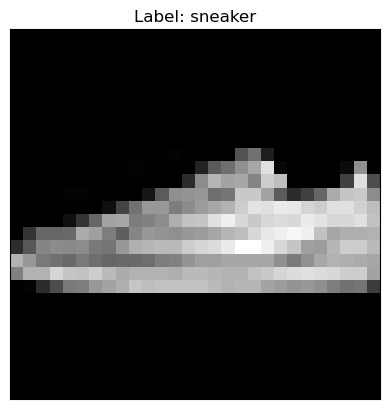

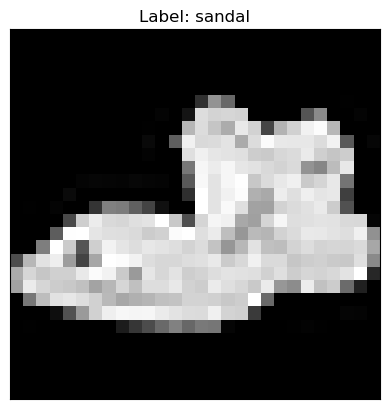

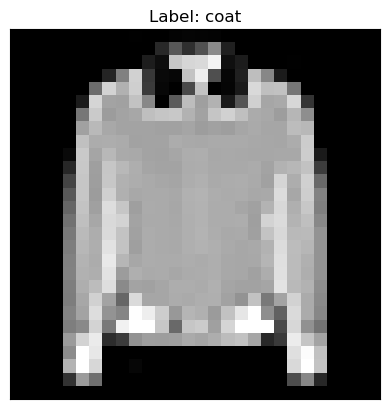

In [3]:
# Get dataset directory
X_path = pathlib.Path("./dataset/fashion_mnist_data.txt").resolve()
y_path = pathlib.Path("./dataset/fashion_mnist_labels.txt").resolve()

# Read dataset into ndarrays
X_orig = np.loadtxt(X_path, delimiter=" ")
y = np.loadtxt(y_path)

# Visualize 3 random images
visualize_random_images(X_orig, y)

# Divide dataset into train and test (stratified)
X_train_orig, X_test_orig, y_train, y_test = train_test_split(
    X_orig, y, test_size=0.5, random_state=SEED, stratify=y
)

## Question 1
### 1., 2.

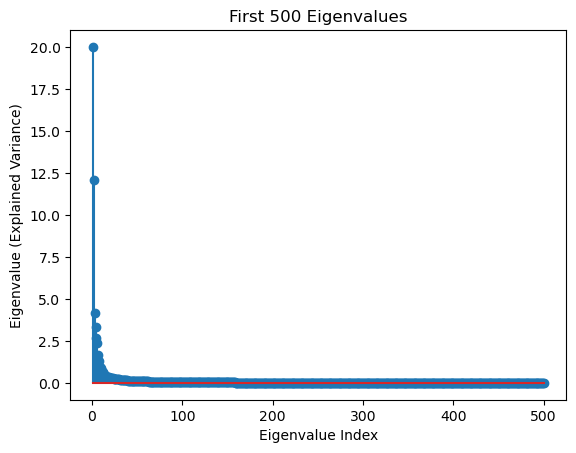

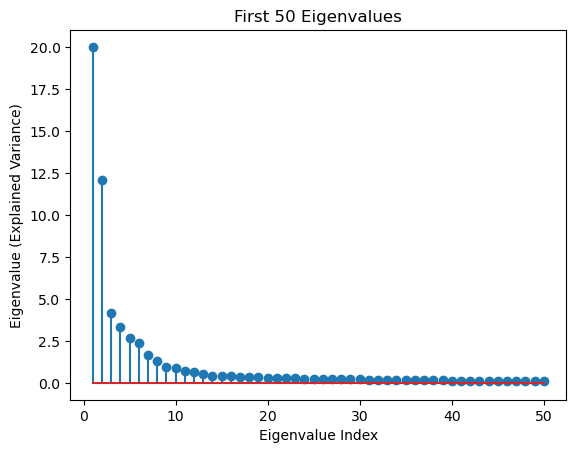

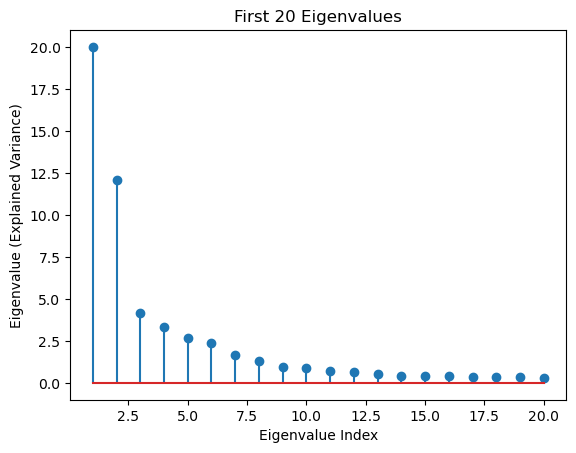

In [4]:
# Center the data by subtracting the mean of the whole data from each sample.
X_train_orig_centered = X_train_orig - np.mean(X_train_orig, axis=0)
X_test_orig_centered = X_test_orig - np.mean(X_train_orig, axis=0)

# Get the PCA object
pca_all = PCA()
# Fit PCA and get all eigenvalues
eigenvalues = pca_all.fit(X_train_orig_centered).explained_variance_
# Plot the first 500, 50, 20 eigenvalues
for n in [500, 50, 20]:
    plt.figure()
    plt.title(f"First {n} Eigenvalues")
    plt.xlabel("Eigenvalue Index")
    plt.ylabel("Eigenvalue (Explained Variance)")
    plt.stem(np.arange(1, n + 1), eigenvalues[:n])

I would choose the first 11 components.
### 3.

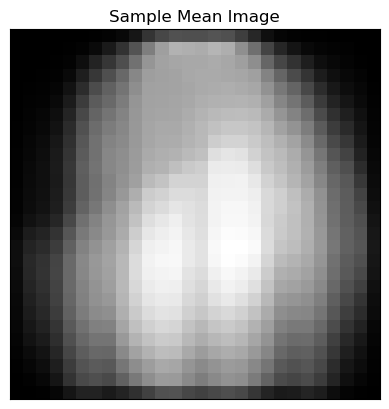

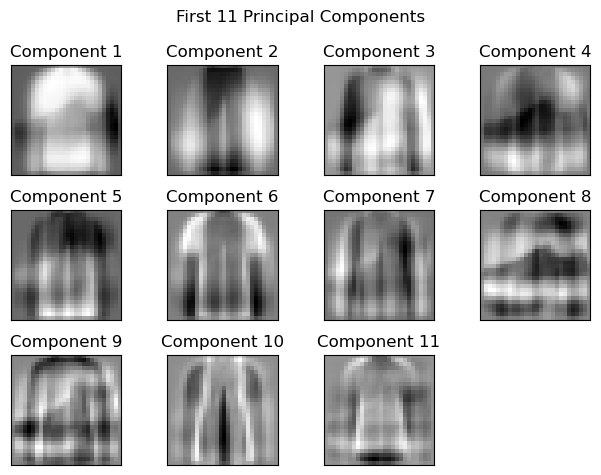

In [5]:
# Calculate sample mean image of training set
sample_mean_image = np.mean(X_train_orig, axis=0)
sample_mean_image = reshape_images(sample_mean_image)
# Display the sample mean image
plt.figure()
plt.title(f"Sample Mean Image")
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.imshow(sample_mean_image, cmap="gray", interpolation="none")

# Display the first 11 pca components as an image
# Get the PCA object
pca_11 = PCA(n_components=11)
# Fit PCA
X_train_orig_11 = pca_11.fit(X_train_orig_centered)
# Display first 11 components as images
plt.figure()
plt.suptitle("First 11 Principal Components")
for i in range(11):
    component_image = reshape_images(pca_11.components_[i])
    plt.subplot(3, 4, i + 1)
    plt.title(f"Component {i + 1}")
    plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    plt.imshow(component_image, cmap="gray", interpolation="none")
plt.tight_layout()

I would have expected the pixel-wise mean of all training set images to be unrecognisable.\
After all, no seperation was made with respect to the classes. After computations,\
I seem to be mostly correct. Although there seems to be some hints of some classes.\
\
PCA is a method that finds orthogonal basis vectors that maximizes the variance \
in the data. I would have expected PCA to seperate different classes into different\
principal components. However, there seems to be multiple classes in each principle\
component. PCA seems to have seperated multiple classes into different values in\
the same image. The seperation in grayscale values get worse as the principal \
component number increases. There also seems to be more categories in each \
principal component as the principal component number increases.

### 4.

In [6]:
trained_gaussian_classifiers = {}
transformed_train_feature_spaces = {}
fitted_pca = {}

# Train quadratic gaussian classifiers for different PCA dimensions
for feature_count in np.uint16(np.linspace(1, 400, NUMBER_OF_DIMENSIONS)):
    # Fit PCA
    fitted_pca[feature_count] = PCA(n_components=feature_count).fit(X_train_orig_centered)
    # Transform feature space
    transformed_train_feature_spaces[feature_count] = fitted_pca[feature_count].transform(X_train_orig_centered)
    # Train quadratic gaussian classifier
    trained_gaussian_classifiers[feature_count] = QuadraticDiscriminantAnalysis().fit(transformed_train_feature_spaces[feature_count], y_train)

### 5.

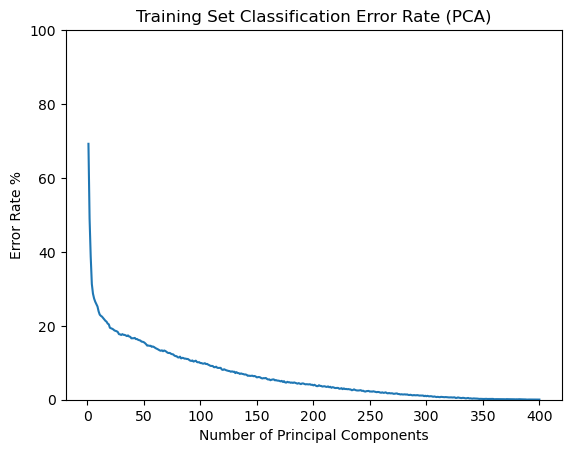

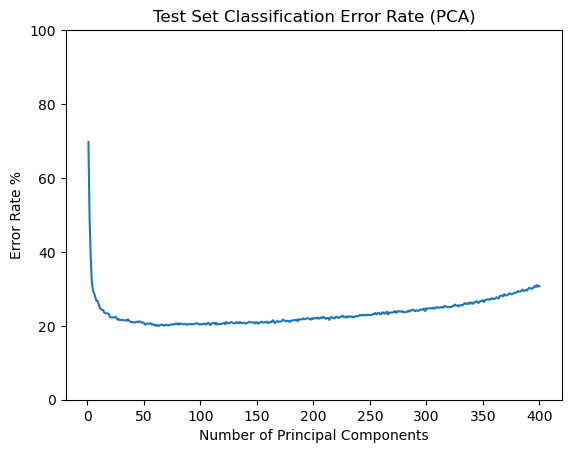

In [7]:
train_accuracy = {}
test_accuracy = {}
train_error_rate = {}
test_error_rate = {}

# Predict with quadratic gaussian classifiers
for feature_count in np.uint16(np.linspace(1, 400, NUMBER_OF_DIMENSIONS)):
    # Calculate accuracy
    train_accuracy[feature_count] = trained_gaussian_classifiers[feature_count].score(transformed_train_feature_spaces[feature_count], y_train)
    test_accuracy[feature_count] = trained_gaussian_classifiers[feature_count].score(fitted_pca[feature_count].transform(X_test_orig_centered), y_test)
    # Calculate error rate
    train_error_rate[feature_count] = (1 - train_accuracy[feature_count]) * 100
    test_error_rate[feature_count] = (1 - test_accuracy[feature_count]) * 100

# Plot the results
plt.figure()
plt.title("Training Set Classification Error Rate (PCA)")
plt.xlabel("Number of Principal Components")
plt.ylabel("Error Rate %")
plt.ylim(0, 100)
plt.plot(list(train_error_rate.keys()), list(train_error_rate.values()))

plt.figure()
plt.title("Test Set Classification Error Rate (PCA)")
plt.xlabel("Number of Principal Components")
plt.ylabel("Error Rate %")
plt.ylim(0, 100)
plt.plot(list(test_error_rate.keys()), list(test_error_rate.values()))

## Question 2

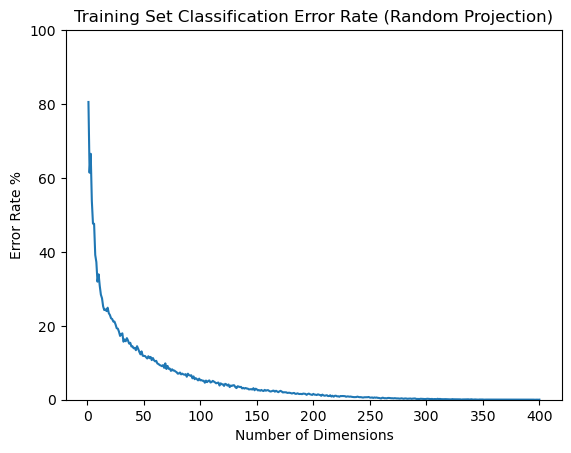

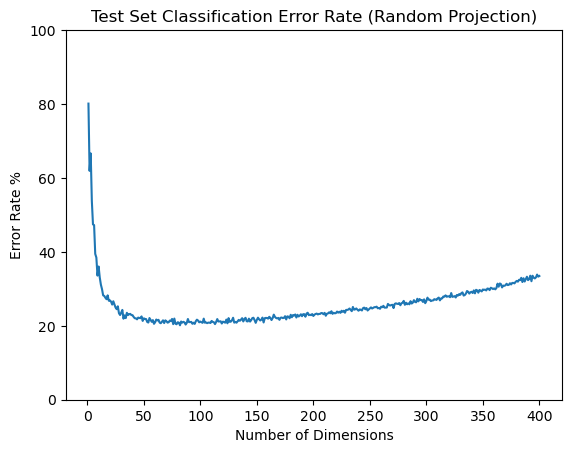

In [9]:
trained_gaussian_classifiers = {}
transformed_train_feature_spaces = {}
fitted_rand_proj = {}

# Train quadratic gaussian classifiers for different PCA dimensions
for feature_count in np.uint16(np.linspace(1, 400, NUMBER_OF_DIMENSIONS)):
    # Fit PCA
    fitted_rand_proj[feature_count] = SparseRandomProjection(n_components=feature_count).fit(X_train_orig_centered)
    # Transform feature space
    transformed_train_feature_spaces[feature_count] = fitted_rand_proj[feature_count].transform(X_train_orig_centered)
    # Train quadratic gaussian classifier
    trained_gaussian_classifiers[feature_count] = QuadraticDiscriminantAnalysis().fit(transformed_train_feature_spaces[feature_count], y_train)

train_accuracy = {}
test_accuracy = {}
train_error_rate = {}
test_error_rate = {}

# Predict with quadratic gaussian classifiers
for feature_count in np.uint16(np.linspace(1, 400, NUMBER_OF_DIMENSIONS)):
    # Calculate accuracy
    train_accuracy[feature_count] = trained_gaussian_classifiers[feature_count].score(transformed_train_feature_spaces[feature_count], y_train)
    test_accuracy[feature_count] = trained_gaussian_classifiers[feature_count].score(fitted_rand_proj[feature_count].transform(X_test_orig_centered), y_test)
    # Calculate error rate
    train_error_rate[feature_count] = (1 - train_accuracy[feature_count]) * 100
    test_error_rate[feature_count] = (1 - test_accuracy[feature_count]) * 100

# Plot the results
plt.figure()
plt.title("Training Set Classification Error Rate (Random Projection)")
plt.xlabel("Number of Dimensions")
plt.ylabel("Error Rate %")
plt.ylim(0, 100)
plt.plot(list(train_error_rate.keys()), list(train_error_rate.values()))

plt.figure()
plt.title("Test Set Classification Error Rate (Random Projection)")
plt.xlabel("Number of Dimensions")
plt.ylabel("Error Rate %")
plt.ylim(0, 100)
plt.plot(list(test_error_rate.keys()), list(test_error_rate.values()))

PCA error rate plots are smoother while random projection plots are more jagged.\
This means that ...
## Question 3
### 1.

Shape of X_isomap: (10000, 2)


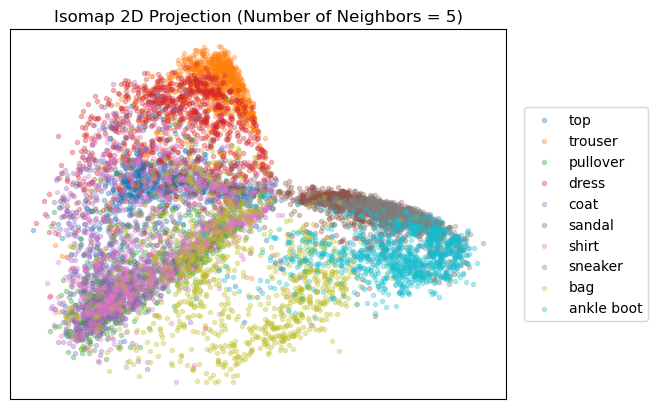

Shape of X_isomap: (10000, 2)


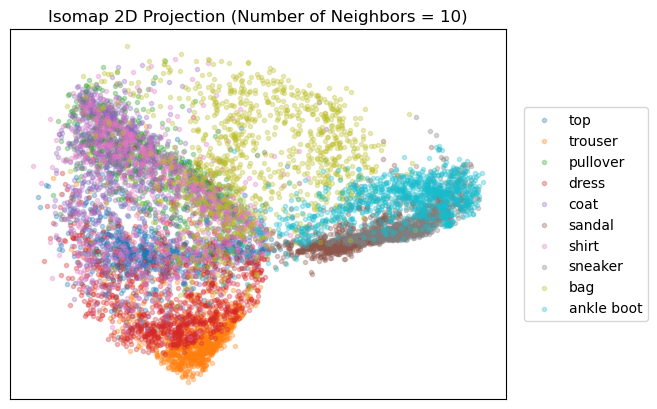

Shape of X_isomap: (10000, 2)


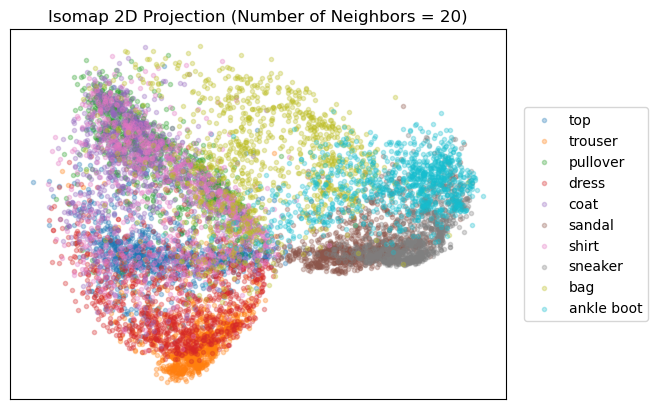

Shape of X_isomap: (10000, 2)


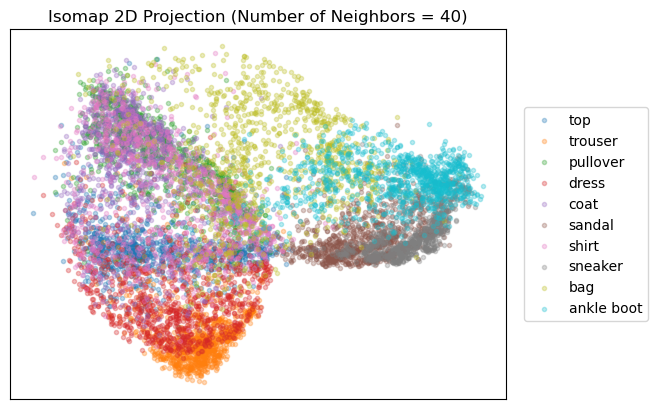

Shape of X_isomap: (10000, 2)


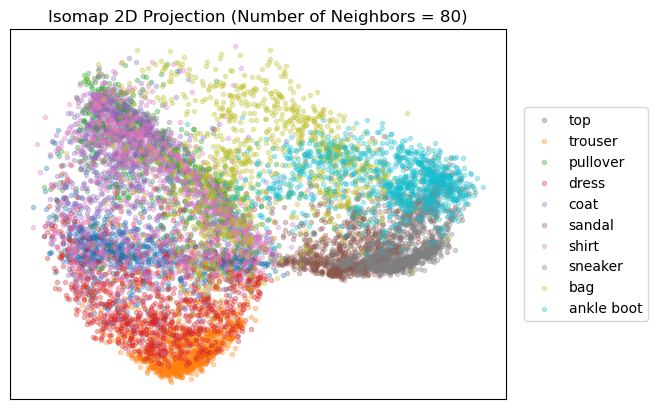

Shape of X_isomap: (10000, 2)


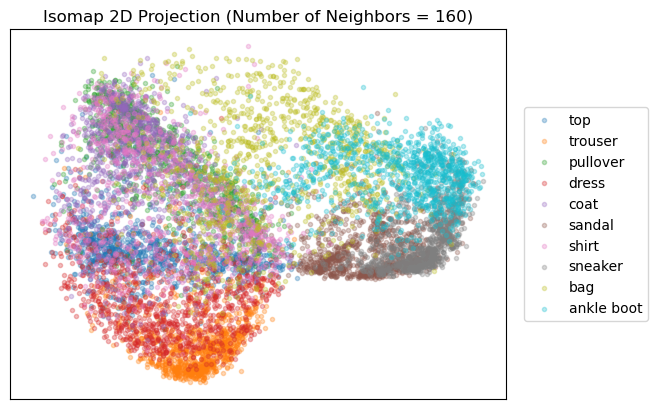

Shape of X_isomap: (10000, 2)


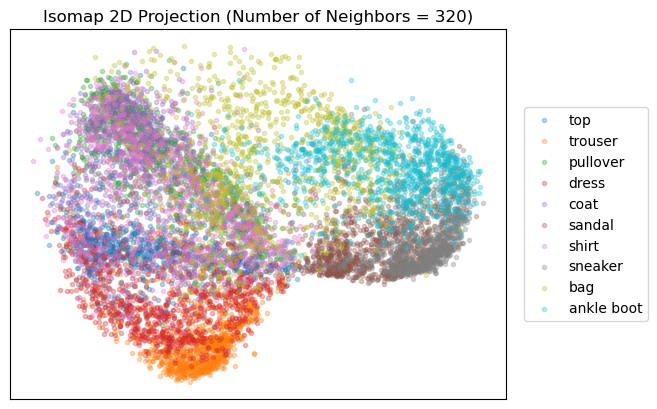

Shape of X_isomap: (10000, 2)


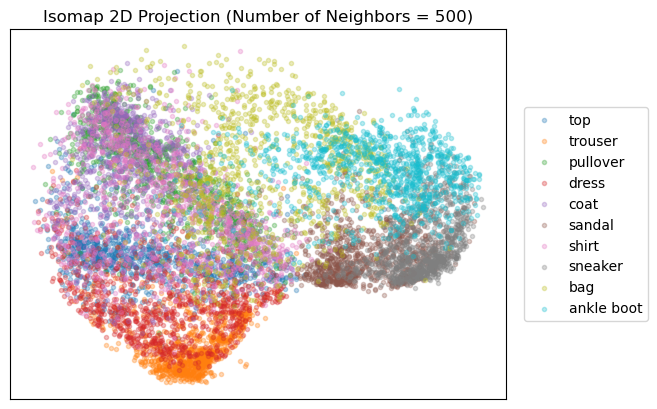

In [5]:
for n in [5, 10, 20, 40, 80, 160, 320, 500]:
    # Use Isomap to reduce dimensionality to 2 dimensions
    isomap = Isomap(n_neighbors=n)
    X_isomap = isomap.fit_transform(X_orig)
    print(f"Shape of X_isomap: {X_isomap.shape}")

    # Plot the results
    for i, label in enumerate(np.unique(y)):  # Different colors for each label
        # Plot the points
        plt.scatter(X_isomap[y == label, 0], X_isomap[y == label, 1], label=label_name(label), marker=".", alpha=0.3)

    plt.title(f"Isomap 2D Projection (Number of Neighbors = {n})")
    plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.5))
    plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    plt.show()

### 2., 3.

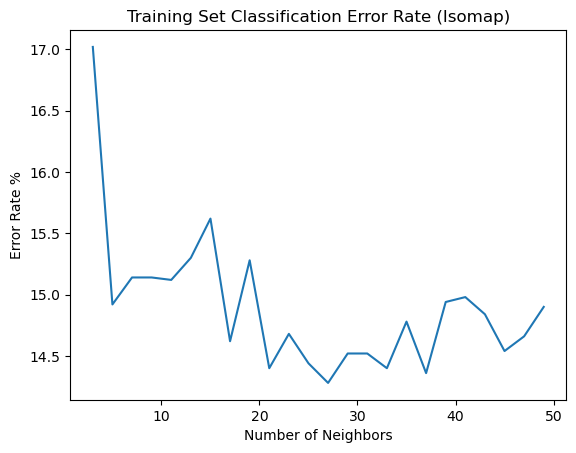

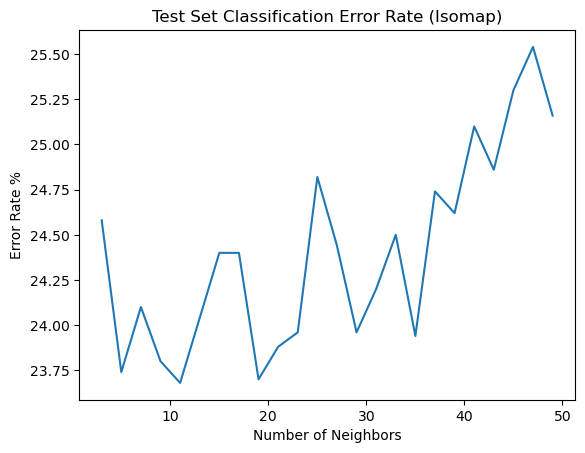

In [9]:
# train_accuracy_neighbors = {}
# test_accuracy_neighbors = {}
# train_error_rate_neighbors = {}
# test_error_rate_neighbors = {}

# # Determine number of neighbors
# for neighbor_count in np.uint16(np.arange(3, 50, 2)):
#     # Fit Isomap
#     fitted_isomap = Isomap(n_neighbors=neighbor_count, n_components=80).fit(X_train_orig_centered)
#     # Transform feature space
#     transformed_train_feature_space = fitted_isomap.transform(X_train_orig_centered)
#     # Train quadratic gaussian classifier
#     trained_gaussian_classifier = QuadraticDiscriminantAnalysis().fit(transformed_train_feature_space, y_train)
#     # Calculate accuracy
#     train_accuracy_neighbors[neighbor_count] = trained_gaussian_classifier.score(transformed_train_feature_space, y_train)
#     test_accuracy_neighbors[neighbor_count] = trained_gaussian_classifier.score(fitted_isomap.transform(X_test_orig_centered), y_test)
#     # Calculate error rate
#     train_error_rate_neighbors[neighbor_count] = (1 - train_accuracy_neighbors[neighbor_count]) * 100
#     test_error_rate_neighbors[neighbor_count] = (1 - test_accuracy_neighbors[neighbor_count]) * 100

# # Plot the results
# plt.figure()
# plt.title("Training Set Classification Error Rate (Isomap)")
# plt.xlabel("Number of Neighbors")
# plt.ylabel("Error Rate %")
# plt.ylim(0, 100)
# plt.plot(list(train_error_rate_neighbors.keys()), list(train_error_rate_neighbors.values()))

# plt.figure()
# plt.title("Test Set Classification Error Rate (Isomap)")
# plt.xlabel("Number of Neighbors")
# plt.ylabel("Error Rate %")
# plt.ylim(0, 100)
# plt.plot(list(test_error_rate_neighbors.keys()), list(test_error_rate_neighbors.values()))

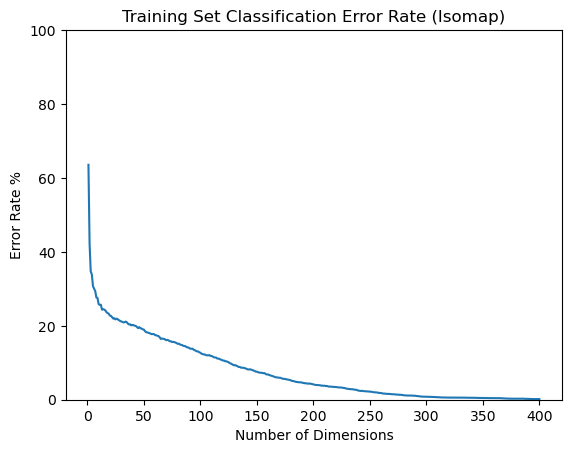

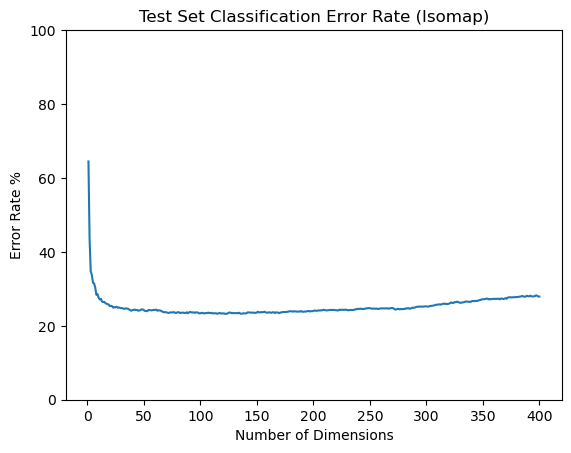

In [5]:
train_accuracy = {}
test_accuracy = {}
train_error_rate = {}
test_error_rate = {}

# Train quadratic gaussian classifiers for different Isomap dimensions
for feature_count in np.uint16(np.linspace(1, 400, NUMBER_OF_DIMENSIONS)):
    # Fit Isomap
    fitted_isomap = Isomap(n_neighbors=11, n_components=feature_count).fit(X_train_orig_centered)
    # Transform feature space
    transformed_train_feature_space = fitted_isomap.transform(X_train_orig_centered)
    # Train quadratic gaussian classifier
    trained_gaussian_classifier = QuadraticDiscriminantAnalysis().fit(transformed_train_feature_space, y_train)
    # Calculate accuracy
    train_accuracy[feature_count] = trained_gaussian_classifier.score(transformed_train_feature_space, y_train)
    test_accuracy[feature_count] = trained_gaussian_classifier.score(fitted_isomap.transform(X_test_orig_centered), y_test)
    # Calculate error rate
    train_error_rate[feature_count] = (1 - train_accuracy[feature_count]) * 100
    test_error_rate[feature_count] = (1 - test_accuracy[feature_count]) * 100
    
# Plot the results
plt.figure()
plt.title("Training Set Classification Error Rate (Isomap)")
plt.xlabel("Number of Dimensions")
plt.ylabel("Error Rate %")
plt.ylim(0, 100)
plt.plot(list(train_error_rate.keys()), list(train_error_rate.values()))

plt.figure()
plt.title("Test Set Classification Error Rate (Isomap)")
plt.xlabel("Number of Dimensions")
plt.ylabel("Error Rate %")
plt.ylim(0, 100)
plt.plot(list(test_error_rate.keys()), list(test_error_rate.values()))

## Question 4

Shape of X_tsne: (10000, 2)


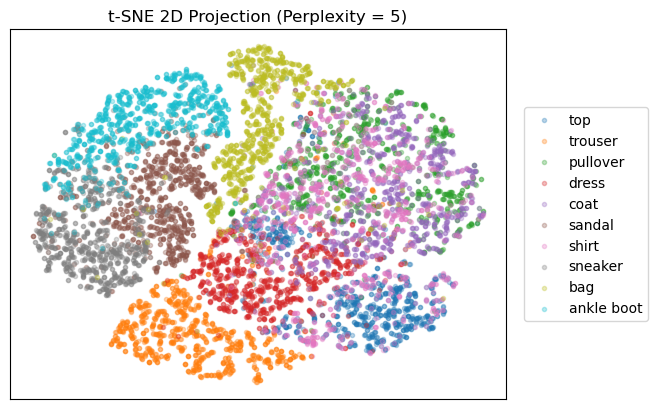

Shape of X_tsne: (10000, 2)


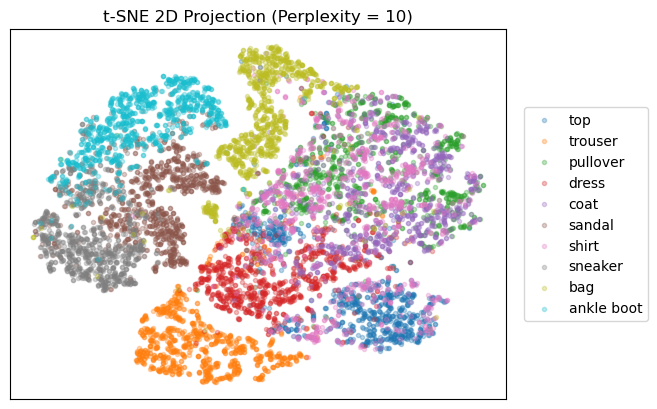

Shape of X_tsne: (10000, 2)


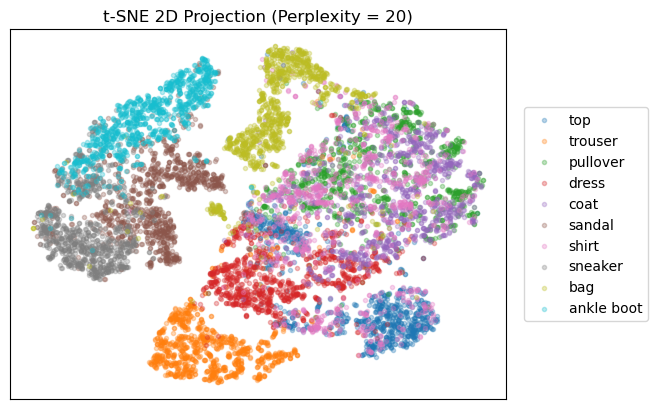

Shape of X_tsne: (10000, 2)


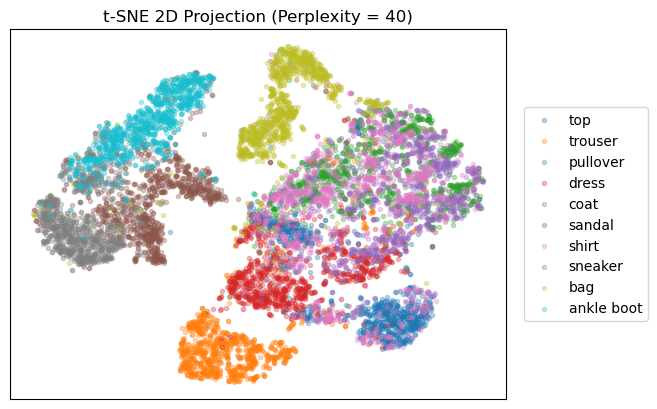

Shape of X_tsne: (10000, 2)


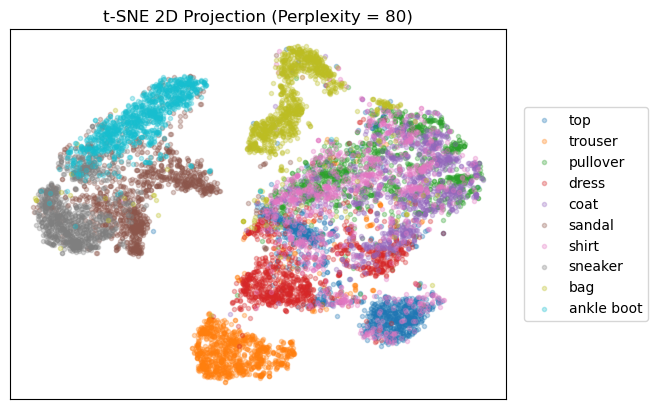

Shape of X_tsne: (10000, 2)


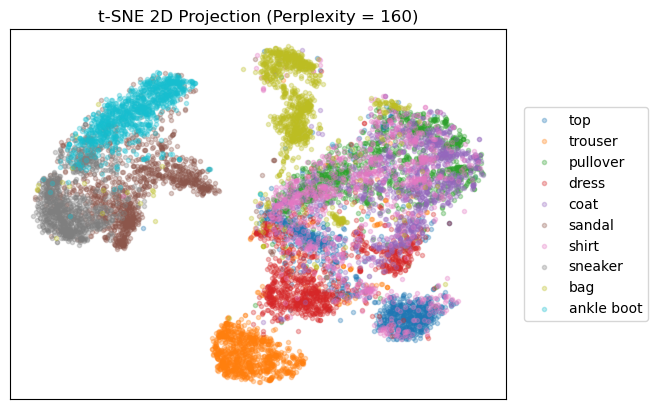

Shape of X_tsne: (10000, 2)


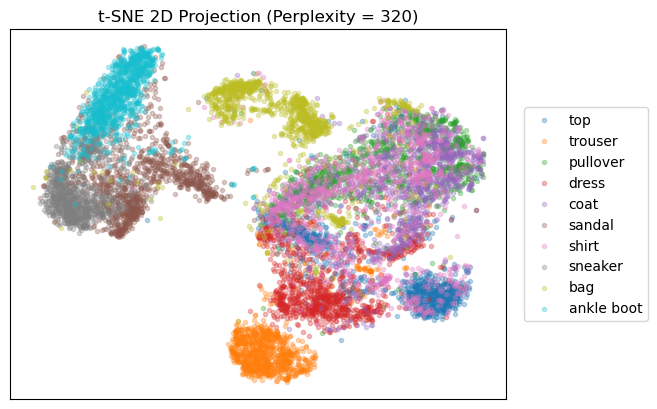

Shape of X_tsne: (10000, 2)


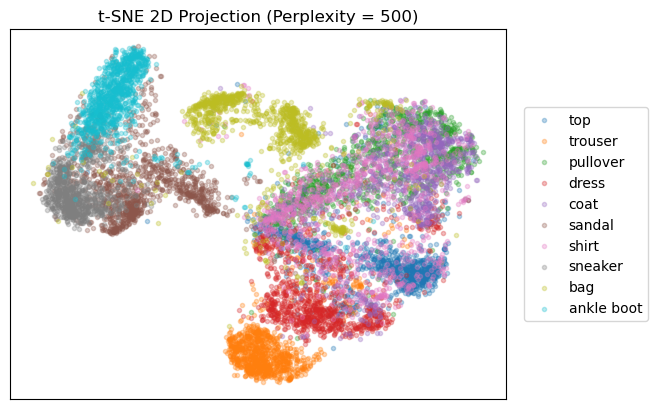

In [5]:
for n in [5, 10, 20, 40, 80, 160, 320, 500]:
    # Use t-SNE to reduce dimensionality to 2 dimensions
    tsne = TSNE(perplexity=n, random_state=SEED, n_jobs=-1)
    X_tsne = tsne.fit_transform(X_orig)
    print(f"Shape of X_tsne: {X_tsne.shape}")

    # Plot the results
    for i, label in enumerate(np.unique(y)):  # Different colors for each label
        # Plot the points
        plt.scatter(X_tsne[y == label, 0], X_tsne[y == label, 1], label=label_name(label), marker=".", alpha=0.3)

    plt.title(f"t-SNE 2D Projection (Perplexity = {n})")
    plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.5))
    plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    plt.show()